In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
training = pd.read_csv('./Data/Covid/200809COVID19MEXICO.csv',encoding="ISO-8859-1")

In [3]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091695 entries, 0 to 1091694
Data columns (total 35 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   FECHA_ACTUALIZACION  1091695 non-null  object
 1   ID_REGISTRO          1091695 non-null  object
 2   ORIGEN               1091695 non-null  int64 
 3   SECTOR               1091695 non-null  int64 
 4   ENTIDAD_UM           1091695 non-null  int64 
 5   SEXO                 1091695 non-null  int64 
 6   ENTIDAD_NAC          1091695 non-null  int64 
 7   ENTIDAD_RES          1091695 non-null  int64 
 8   MUNICIPIO_RES        1091695 non-null  int64 
 9   TIPO_PACIENTE        1091695 non-null  int64 
 10  FECHA_INGRESO        1091695 non-null  object
 11  FECHA_SINTOMAS       1091695 non-null  object
 12  FECHA_DEF            1091695 non-null  object
 13  INTUBADO             1091695 non-null  int64 
 14  NEUMONIA             1091695 non-null  int64 
 15  EDAD           

In [4]:
training['Vive']= training['FECHA_DEF'].apply(lambda current: 1 if current == '9999-99-99' else 0)
training.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,Vive
0,2020-08-09,11c49c,2,3,2,1,2,2,2,1,...,2,2,2,1,1,99,MÃ©xico,99,97,1
1,2020-08-09,144935,2,3,2,2,26,2,2,1,...,2,2,2,1,1,99,MÃ©xico,99,97,1
2,2020-08-09,1bf200,2,4,9,1,9,9,15,2,...,2,2,2,99,1,99,MÃ©xico,99,2,1
3,2020-08-09,010133,2,4,26,1,26,26,55,1,...,2,2,2,99,1,99,MÃ©xico,99,97,1
4,2020-08-09,1a1635,2,3,15,2,15,15,33,2,...,1,2,2,1,1,99,MÃ©xico,99,2,0


In [5]:
vivos = 0
muertos = 0
for sobrevive in training['Vive']:
    if sobrevive == 1:
        vivos = vivos+1
    else:
        muertos = muertos+1
print('Vivoos {}'.format(vivos))
print('Muertos {}'.format(muertos))

Vivoos 1024530
Muertos 67165


In [6]:
muertesPorCovid = 0
for sobrevive, resultado in zip(training.Vive,training.RESULTADO):
    if sobrevive == 0:
        if resultado == 1:
            muertesPorCovid+=1
muertesPorCovid

52298

In [7]:
def isDeadByCovid(persona):
    vive = persona['Vive']
    resultado = persona['RESULTADO']
    if vive == 0:
        if resultado == 1:
            return 1
        else:
            return 0
    else:
        return 0


In [8]:
training['MuerteCovid'] = training.apply(isDeadByCovid,axis=1)

In [9]:
m = 0
for x in training['MuerteCovid']:
    if x == 1:
        m+=1
m

52298

## Entrenando al Modelo
### Primero queremos ver si lo van a entubar

In [19]:
#code cell 8
#create the array for the target values
y_target = training["INTUBADO"].values

In [36]:
#code cell 9
columns = ["SEXO","NEUMONIA","DIABETES","ASMA","INMUSUPR","UCI","RESULTADO"]
#create the variable to hold the features that the classifier will use
X_input = training[list(columns)].values

In [37]:
#code cell 10
#import the tree module from the sklearn library
from sklearn import tree

#create clf_train as a decision tree classifier object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)

#train the model using the fit() method of the decision tree object. 
#Supply the method with the input variable X_input and the target variable y_target
clf_train = clf_train.fit(X_input, y_target)


In [38]:
#code cell 11
clf_train.score(X_input,y_target)

0.9847539834843981

### Visualizar el árbol


In [43]:
clasificacion = ['SE INTUBA','NO SE INTUBA','No Aplica','Se Ingonar','No Especificado']

In [44]:
#code cell 12
#from sklearn.externals.six import StringIO
import sklearn
with open("./Data/Covid.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns,
                          class_names=clasificacion)


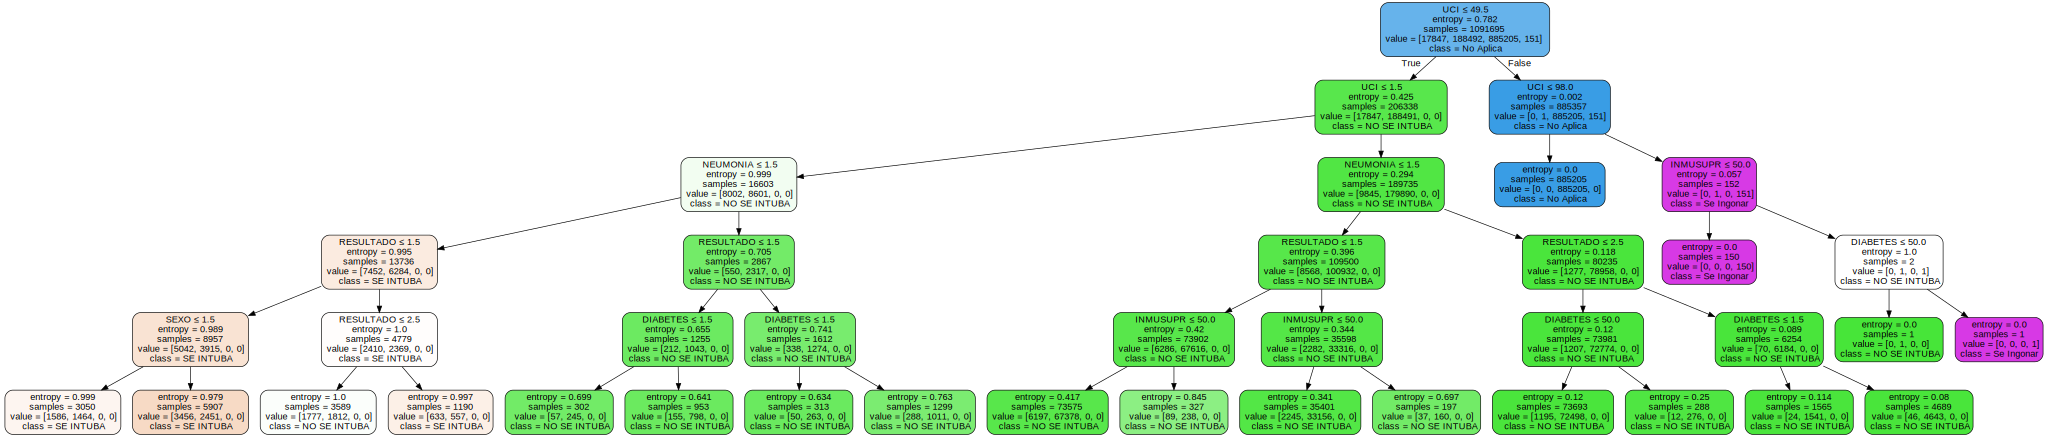

In [45]:
import graphviz
dot_data = tree.export_graphviz(
    clf_train,
    out_file = None,
    class_names = clasificacion,
    
    feature_names = columns,
    filled= True,
    rounded= True,
    special_characters = True
)
graph = graphviz.Source(dot_data)
graph.render('COVID',format='png')
graph
